# Lecture 17: Fast Fourior Transform: Part 1

First, we will load the Python packages which will be used in this demo:

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft,rfftfreq
from pandas import read_csv
import session_info

## Activity 1: Exploring time and frequency space
In this activity, well test how the fourier transform modifies functions constructed from combinations of simple sinusoidal curves.

First, load up the necessary packages to use scipy's FFT function and visualize it in this notebook:

Next, define a function to apply the FFT to a timeseries, and plot a comparison between the two:

In [27]:
def calculate_and_plot_fft_example(a1,p1,a2,p2,a3,p3):
    # generate the time array
    n_timesteps = 1000
    timestep = 1 # seconds
    max_time = n_timesteps*timestep # seconds
    time = np.arange(0, max_time, timestep) # seconds
    max_frequency = 1/(n_timesteps*timestep) # Hz
    
    # make the sin curves
    y_1 = a1*np.sin(p1*2*np.pi*time/max_time) # meters
    y_2 = a2*np.sin(p2*2*np.pi*time/max_time) # meters
    y_3 = a3*np.sin(p3*2*np.pi*time/max_time) # meters
    y = y_1 + y_2 + y_3
    
    # apply FFT to curve
    y_fft = np.abs(rfft(y)) # 
    x_fft = rfftfreq(np.size(y),timestep) # Hz
    
    # apply some scalings for an intuitive plot
    y_fft_scaled = y_fft/(len(time)/2)
    cycles = x_fft/max_frequency
    
    # make a figure
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.plot(time,y)
    plt.ylabel('Amplitude (m)',fontsize=14)
    plt.xlabel('Time (s)',fontsize=14)
    plt.grid(linestyle='--',alpha=0.4)
    plt.title('Signal',fontsize=17)
    plt.subplot(1,2,2)
    plt.plot(cycles,y_fft_scaled)
    plt.ylabel('Amplitude (m)',fontsize=14)
    plt.xlabel('Cycles',fontsize=14)
    plt.grid(linestyle='--',alpha=0.4)
    plt.xlim([-1,10+1]) # note: 10 is the max multiplier of y1
    plt.title('FFT of Signal',fontsize=17)
    plt.show()

Using the Python function above, we can the FFT algorithm on an example function over a 1000 second time interval:
$$
y(t) = a_1\text{sin}\left(p_1 \frac{2\pi}{1000}(t)\right) + a_2\text{sin}\left(p_2 \frac{2\pi}{1000}(t)\right) + a_3\text{sin}\left(p_3 \frac{2\pi}{1000}(t)\right)
$$

### Check your mathematical intuition!
Before we plot the function above, can you visualize what it will look like?

In [28]:
interact(calculate_and_plot_fft_example,
         a1=widgets.IntSlider(min=1, max=10, step=1, value=1),
         p1=widgets.IntSlider(min=1, max=10, step=1, value=1),
         a2=widgets.IntSlider(min=0, max=10, step=1, value=0),
         p2=widgets.IntSlider(min=0, max=10, step=1, value=0),
         a3=widgets.FloatSlider(min=0, max=1, step=0.1, value=0),
         p3=widgets.FloatSlider(min=0, max=3, step=0.3, value=0));

interactive(children=(IntSlider(value=1, description='a1', max=10, min=1), IntSlider(value=1, description='p1'…

#### Questions for exploration
1. How does varying the period $p_1$ affect the signal? its FFT?
2. How does varying the amplitude $a_1$ affect the signal? its FFT?
3. How does the signal vary when a second curve is added? its FFT?
4. How does the signal vary when a third curve is added? its FFT?

## Activity 2: Using FFT with real data
Next, we'll apply the fast fourier transform to a real dataset and explore what the frequency space can tell us about the data. 

In this example, we will use example tide data from a local tide guage in Monterey, CA. The tide data is provided in this repository in the file `CO-OPS_9413450_wl.csv` obtained from https://tidesandcurrents.noaa.gov/harcon.html?id=9413450. 


First, read in the tide data as a numpy array:

In [35]:
import os
df = read_csv('CO-OPS_9413450_wl.csv', header=0, parse_dates=[['Date', 'Time (GMT)']])
print(df.head())

      Date_Time (GMT)  Predicted (ft) Preliminary (ft)  Verified (ft)
0 2022-03-01 00:00:00          -5.744                -          -5.81
1 2022-03-01 00:06:00          -5.695                -          -5.73
2 2022-03-01 00:12:00          -5.639                -          -5.69
3 2022-03-01 00:18:00          -5.578                -          -5.76
4 2022-03-01 00:24:00          -5.511                -          -5.58


## Plot the data
It's always a good idea to visualize the data you're working with. Start by making a plot of the tide data:

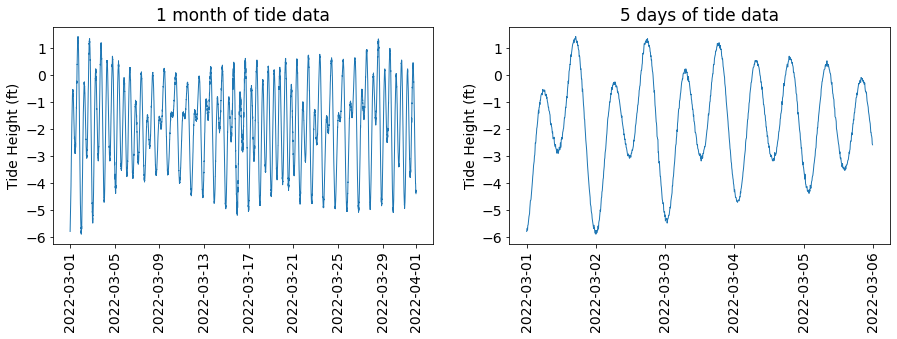

In [41]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(df['Date_Time (GMT)'],df['Verified (ft)'],'-',linewidth=1)
plt.title('1 month of tide data',fontsize=17)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Tide Height (ft)',fontsize=14)
plt.subplot(1,2,2)
plt.plot(df['Date_Time (GMT)'][:10*24*5],df['Verified (ft)'][:10*24*5],'-',linewidth=1)
plt.title('5 days of tide data',fontsize=17)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Tide Height (ft)',fontsize=14)
plt.show()

## Apply the Fourier Transform and Make a Plot

In [44]:
### type your code here using's scipy's rfft and rfftfreq functions
### note that the tide data is provided every 6 minutes

### apply the FFT

### make a plot

# What signals does the FFT capture?

In [35]:
def test_sampling_fequency_with_fft(sample_skip):
    # generate the time array
    n_timesteps = 1000
    timestep = 1 # seconds
    max_time = n_timesteps*timestep # seconds
    time = np.arange(0, max_time, timestep) # seconds
    time_coarse = time[::sample_skip]
    max_frequency = 1/(n_timesteps*timestep) # Hz
    
    # make the sin curves
    p1=1
    y = np.sin(p1*2*np.pi*time/max_time) # meters
    y_coarse = np.sin(p1*2*np.pi*time_coarse/max_time) # meters
    
    # apply FFT to curve
    y_fft = np.abs(rfft(y)) # 
    x_fft = rfftfreq(np.size(y),timestep) # Hz
    cycles = x_fft/max_frequency
    y_fft_coarse = np.abs(rfft(y_coarse)) # 
    x_fft_coarse = rfftfreq(np.size(y_coarse),timestep*sample_skip) # Hz
    cycles_coarse = x_fft_coarse/max_frequency
    
    # make a figure
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.plot(time,y,'b-')
    plt.plot(time_coarse,y_coarse,'k.')
    plt.text(0,-1,'Sample Frequency:\n'+str(1/(timestep*sample_skip)))
    plt.ylabel('Amplitude (m)')
    plt.xlabel('Time (s)')
    plt.grid(linestyle='--',alpha=0.4)
    plt.title('y')
    plt.subplot(1,2,2)
#     plt.plot(x_fft,y_fft)
    plt.plot(x_fft_coarse,y_fft_coarse)
    plt.ylabel('Amplitude (m)')
    plt.xlabel('Cycles')
    plt.grid(linestyle='--',alpha=0.4)
    plt.xlim([-0.001,0.011]) # note: 10 is the max multiplier of y1
    plt.title('y_fft')
    plt.show()

In [36]:
interact(test_sampling_fequency_with_fft,
         sample_skip=widgets.IntSlider(min=1, max=500, step=5, value=1));

interactive(children=(IntSlider(value=1, description='sample_skip', max=500, min=1, step=5), Output()), _dom_c…

### Possible Solutions to Activity 2

This is a solution to Activity 2 prior to scaling

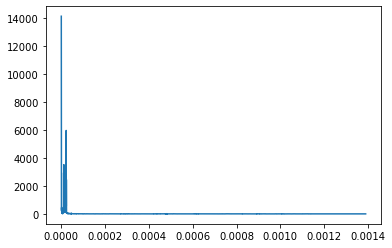

In [52]:
### type your code here using's scipy's rfft and rfftfreq functions
### note that the tide data is provided every 6 minutes

signal = 

### apply the FFT
y = np.abs(rfft(df['Verified (ft)'].values))
N_samples = 
sample_duration = (df['Date_Time (GMT)'][1]-df['Date_Time (GMT)'][0]).seconds
x = rfftfreq(df['Verified (ft)'].size, sample_duration)

### make a plot
plt.plot(x,y)
plt.show()